In [110]:
# Importing nltk library
import nltk

In [111]:
#we can also use the nltk shell to download datasets.
#nltk.download_shell()
# this shell can be used to download datasets.

In [112]:
#importing the spam collection dataset, reading each line.

messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [113]:
#checking length of the imported dataset.

print(len(messages))

5574


In [114]:
#checking how a line of a message looks like from the message dataset.

messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [115]:
# a way to enumerate (iterate) the messages file
# mess_no and messages show that there is probably a TAB delamination.

for mess_no, message in enumerate(messages[:10]):
    print (mess_no, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [116]:
# to verify, we are going to check line 8
# it shows that line 8 has 'spam' then a tab '\t' and then the message.

messages[8]

'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [117]:
# we can try to put that data in dataframe

import numpy as np
import pandas as pd

In [118]:
# in read function, we can use "names" attribute as 'columns'

messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [119]:
#checking message head after bringing it to a dataframe format.

messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [120]:
# peeking into dataframe using info and describe.

messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [121]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [122]:
#peeking the dataframe using groupby labels (spam or ham) and checking top messages in each catagory.

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [123]:
#adding a length column to the dataframe

messages['length'] = messages['message'].apply(len)

In [124]:
#importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

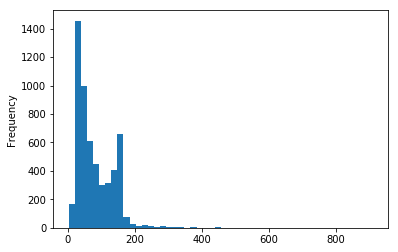

In [125]:
#plotting histogram for length of texts.

messages['length'].plot.hist(bins = 50)

In [126]:
#peeking information for length of each text.

messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [127]:
#per describe, there is a text with more than 900 chars.

messages[messages['length']>900]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2576A770>,
      dtype=object)

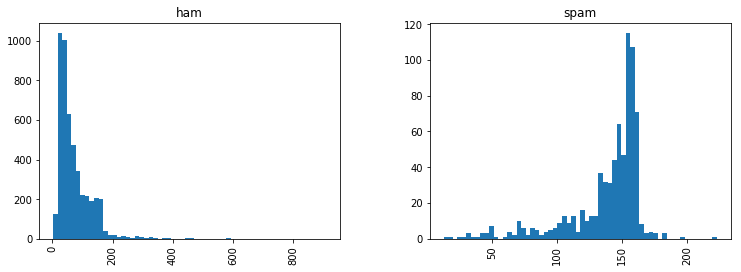

In [128]:
messages.hist(column = 'length', by = 'label', figsize = (12,4), bins = 60)

# when we see the data, it looks like ham messages tend to be smaller in length around 50-100 chars vs spam messages
# tend to be around 130-170 chars lenth.

In [129]:
# a function that can split a sentence into an array of words.

def split (input):
    return input.split()

In [130]:
k = split(messages['message'][11])

In [131]:
#testing the function.

print (k)

['SIX', 'chances', 'to', 'win', 'CASH!', 'From', '100', 'to', '20,000', 'pounds', 'txt>', 'CSH11', 'and', 'send', 'to', '87575.', 'Cost', '150p/day,', '6days,', '16+', 'TsandCs', 'apply', 'Reply', 'HL', '4', 'info']


In [132]:
messages['message'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [133]:
#from nltk.corpus import stopwordsords
from nltk.corpus import stopwords
import string

In [134]:
#creating a sample message, which will later be used for testing cleaning methods, 
#before those methods can be applied to full data.

mess = 'Sample message! Notice: it has punctuations.'

In [135]:
#by cleaning 'mess' from punctuations, creating nopunc variable.

nopunc = [c for c in mess if c not in string.punctuation]

In [136]:
#Joining the nopunc into an array.

nopunc = ''.join(nopunc)

In [137]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuations']

In [138]:
#cleaning the nopunc array from very commonly used words, using stopwords.words('english')

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [139]:
#peeking into the clean_mess

clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [140]:
# creating a text_process function by using methods applied on mess.
# the function will take a simple message and output a clean, unpunctuated and non common worded sentenses.

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [141]:
#testing text_process.
#importing a test message from the messages.

check = text_process(messages['message'][11])

In [142]:
#applying text_process.

messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [143]:
#importing countVectorizer to create bag of words.

from sklearn.feature_extraction.text import CountVectorizer

In [144]:
#creating a bag of words by using countvectorizer and the text_process created before.

bow_transformer = CountVectorizer(analyzer=text_process)

In [145]:
#fitting the complete messages data to the bag of words.

bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x2590F390>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [146]:
#checking the length of bag of words.

print (len(bow_transformer.vocabulary_))

11425


In [147]:
#importing a message from messages dataframe to mess4.
# this will be used to test bag of words.

mess4 = messages['message'][3]

In [148]:
#transforming mess4 using trained bow_transformers.
#this should output the concurrency of each word in a sentence.

bow4 = bow_transformer.transform([mess4])

In [149]:
# checking the shape of the bow4.

print (bow4.shape)

(1, 11425)


In [150]:
# testing bow4 to see if its working right.

print (bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [151]:
#testing if '9554' word was actually used twice in the message.

bow_transformer.get_feature_names()[9554]

'say'

In [152]:
#transforming whole messages data from the dataframe

messages_bow = bow_transformer.transform(messages['message'])

In [153]:
print('Shape of the Sparse Matrix:', messages_bow.shape)

Shape of the Sparse Matrix: (5572, 11425)


In [154]:
#importing Tfidf Transfromer from sklearn to aid prediction.

from sklearn.feature_extraction.text import TfidfTransformer

In [155]:
# fitting the whole messages_bow to the tfidf transformer.

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [156]:
#testing the new tfidf transformer on bow4.

tfidf4 = tfidf_transformer.transform(bow4)

In [157]:
print(tfidf4) 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [158]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [159]:
# applying tfidf transformer to the whole messages_bow.

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [160]:
# importing Multinomial Naive Bayes from Sklearn.

from sklearn.naive_bayes import MultinomialNB

In [161]:
#creating spam_detection_model using multinomial naive bayes and tfidf transfromed messages AND messages labels (spam/ham)

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [174]:
#predicting using tfidf transfromed messages on naive bayes.

all_pred = spam_detect_model.predict(messages_tfidf)

In [164]:
#checking all_pred

all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [165]:
#importing test/train split.

from sklearn.model_selection import train_test_split

In [175]:
#applying train/test split model.
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], 
                                               messages['label'], test_size=0.3, random_state=42)

In [176]:
#creting this awesome pipeline.

from sklearn.pipeline import Pipeline

In [177]:
#this is to show how powerful pipelining is!
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
    ])

# WOW!

In [178]:
#Fitting to the pipeline.

pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x2590F390>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [171]:
# Creating predictions using pipeline.

predictions = pipeline.predict(msg_test)

In [180]:
#Importing and printing classification report and confusion matrix.

from sklearn.metrics import classification_report, confusion_matrix

In [181]:
print (classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

